[4.9537037  0.55613306]
Mean: 0.91
Std Dev: 0.03
AUC: 0.72


TypeError: 'numpy.float64' object is not callable

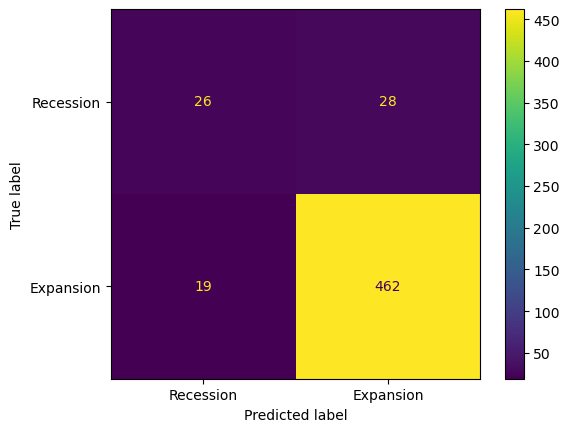

In [4]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.utils import compute_class_weight
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the data into a pandas DataFrame
df = pd.read_csv('~/Desktop/masterThesis/investmentfound/dataWithCycle.csv')

# Extract the features and labels
X = df[['SP500Returns', 'IRSpread', 'IndProdInd_pct_change', 'RealGDP_pct_change']] # features
y = df['PeriodNum'] # labels

# Compute class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y), y = y)

# Initialize the classifier with class_weight
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Compute class weights
class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y), y = y)
print(class_weights)

# Reshape class_weights to have the same shape as y
sample_weights = class_weights[y.ravel()]

# Fit the classifier
clf.fit(X, y, sample_weight=sample_weights)

# Define the number of folds
num_folds = 5

# Calculate the cross-validation scores
scores = cross_val_score(clf, X, y, cv=num_folds)

# Print the mean and standard deviation of the scores
print(f"Mean: {np.mean(scores):.2f}")
print(f"Std Dev: {np.std(scores):.2f}")

# Use cross_val_predict to generate predictions for each fold of the cross-validation
y_pred = cross_val_predict(clf, X, y, cv=5)

# Calculate the confusion matrix
confusion_matrix = confusion_matrix(y, y_pred)

# Create a ConfusionMatrixDisplay object
display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=['Recession', 'Expansion'])

# Plot the confusion matrix
display.plot()

# Make predictions on the test data
y_pred = cross_val_predict(clf, X, y, cv=5)

# Calculate the AUC score
auc = roc_auc_score(y, y_pred)

print(f"AUC: {auc:.2f}")

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y, y_pred)

# Calculate the AUC score
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()